# **Task 1 :Preprocess the Data**

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np

file_path = '/content/diabetes_012_health_indicators_BRFSS2021.csv'
data = pd.read_csv(file_path)

# Convert columns to appropriate types
categorical_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                       'DiffWalk', 'Sex']

for col in categorical_columns:
    data[col] = data[col].astype('category')

numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Handeling missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

class_counts = data['Diabetes_012'].value_counts()
print("Class distribution before handling imbalance:")
print(class_counts)

X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

df = pd.concat([X, y], axis=1)
df_majority = df[df['Diabetes_012'] == 0]
df_minority1 = df[df['Diabetes_012'] == 1]
df_minority2 = df[df['Diabetes_012'] == 2]

df_minority1_upsampled = resample(df_minority1, replace=True, n_samples=len(df_majority), random_state=42)
df_minority2_upsampled = resample(df_minority2, replace=True, n_samples=len(df_majority), random_state=42)

df_upsampled = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled])

X = df_upsampled.drop(columns=['Diabetes_012'])
y = df_upsampled['Diabetes_012']


Class distribution before handling imbalance:
Diabetes_012
0.0    197191
2.0     33568
1.0      5619
Name: count, dtype: int64


# **Task 2: Plot Detailed Graphs for Each Column**

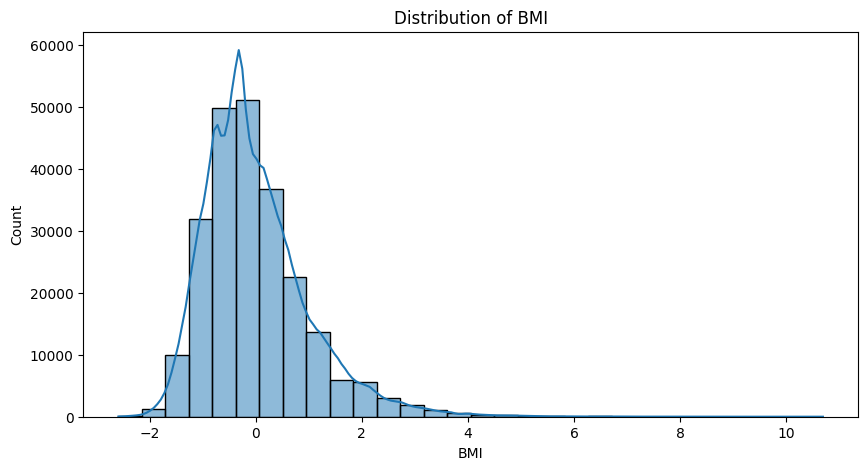

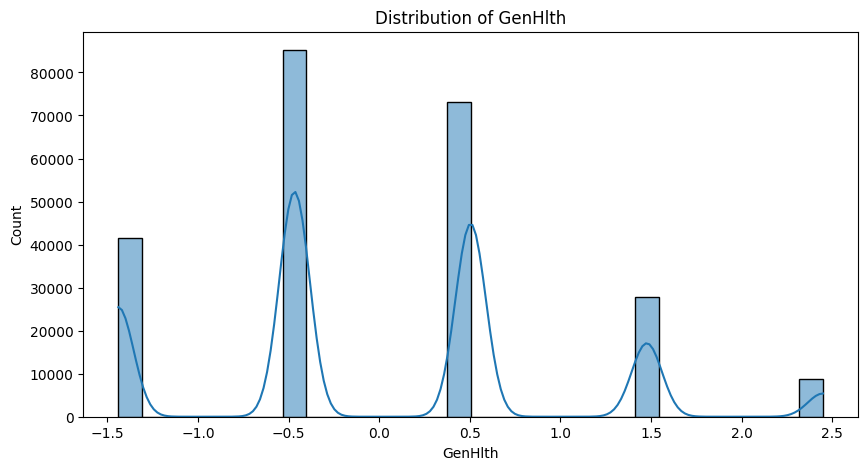

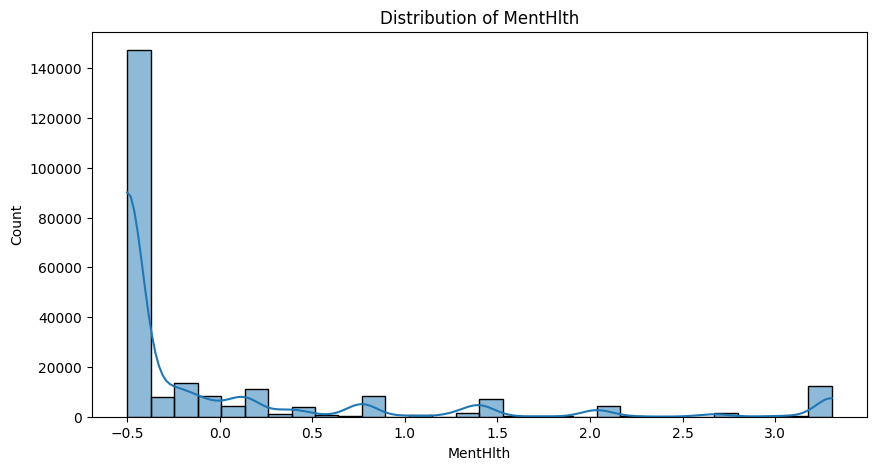

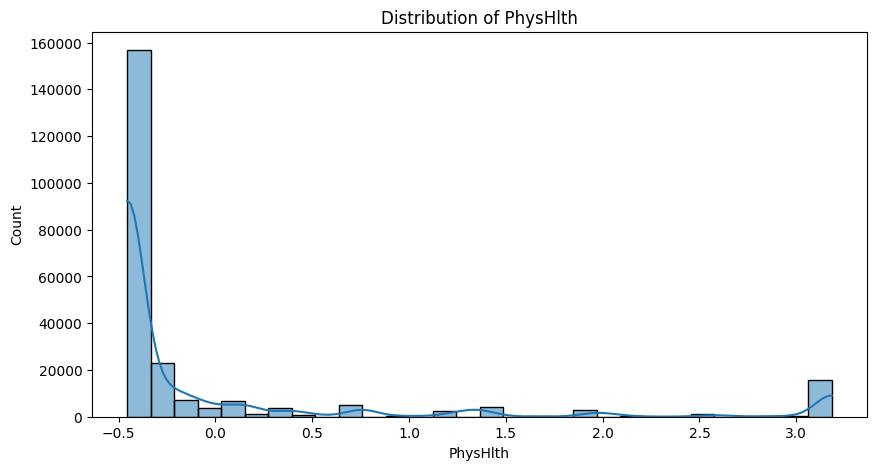

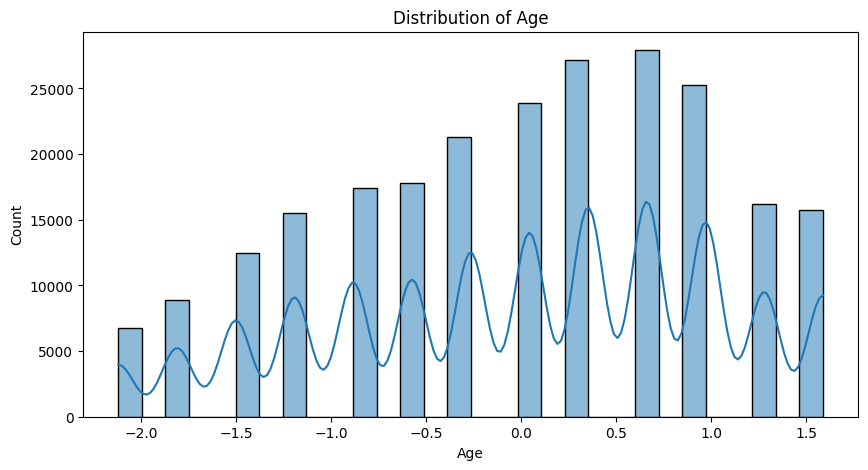

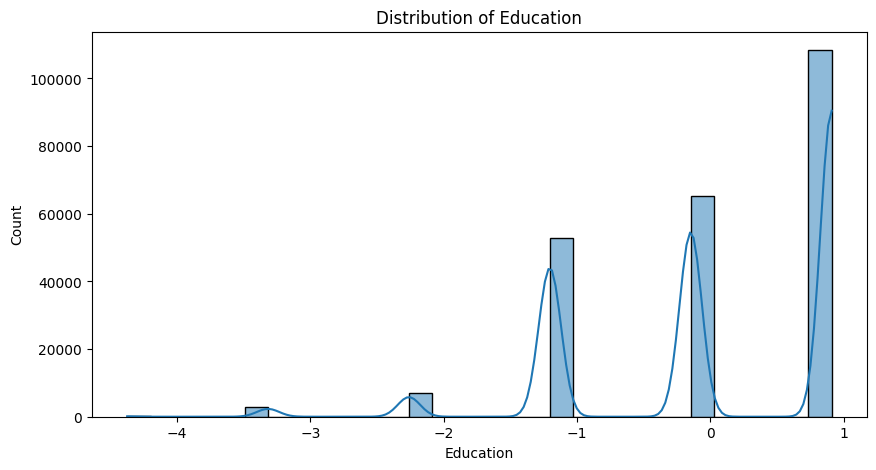

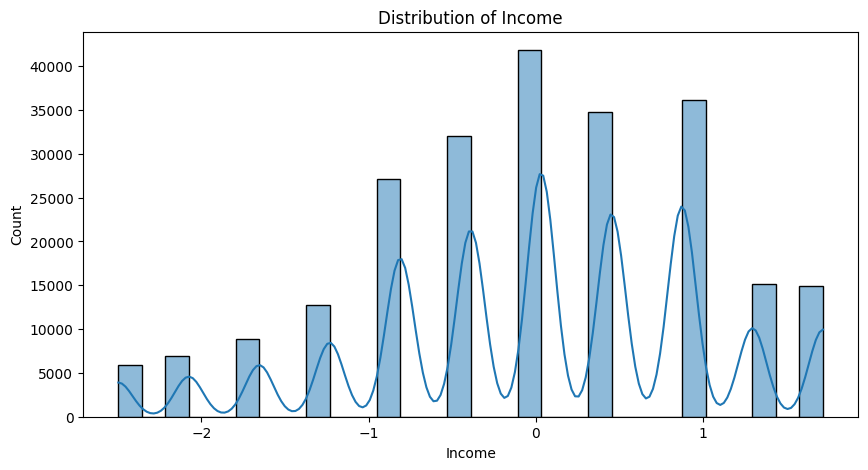

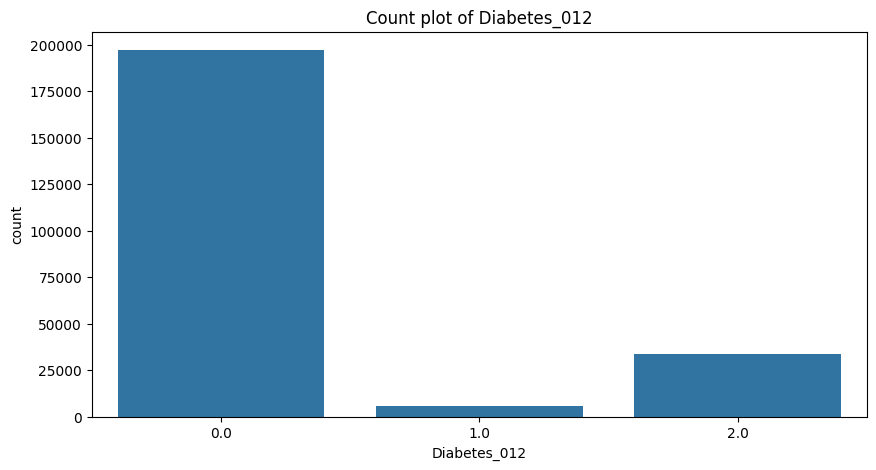

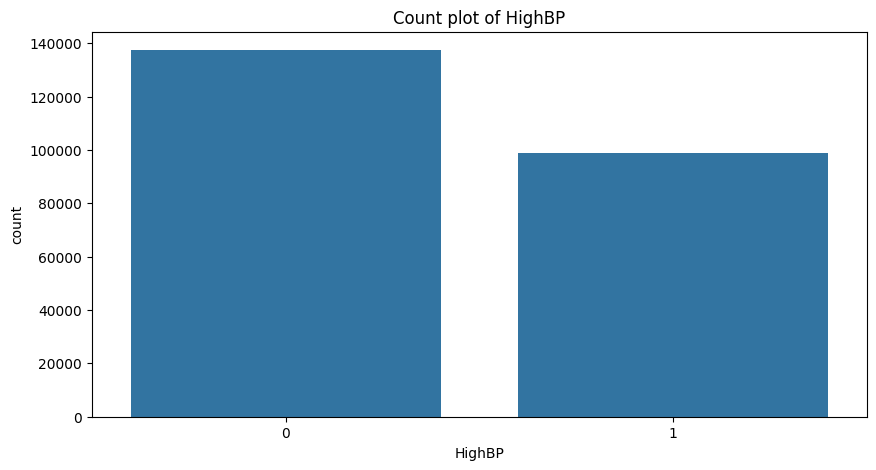

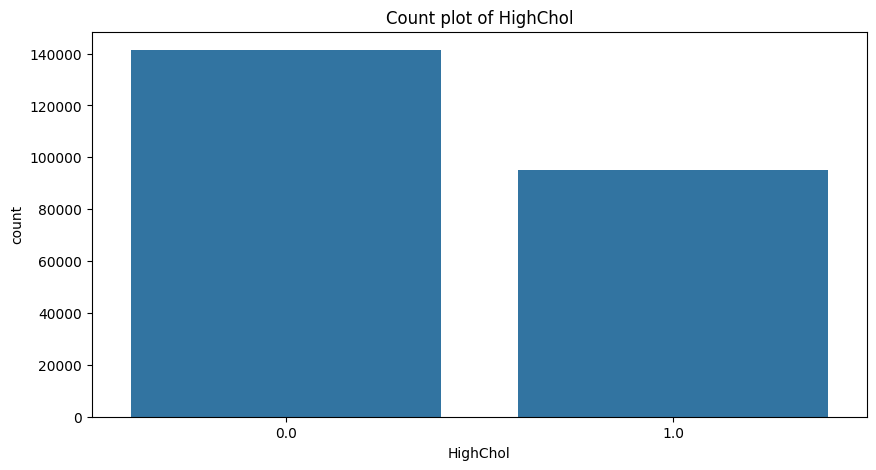

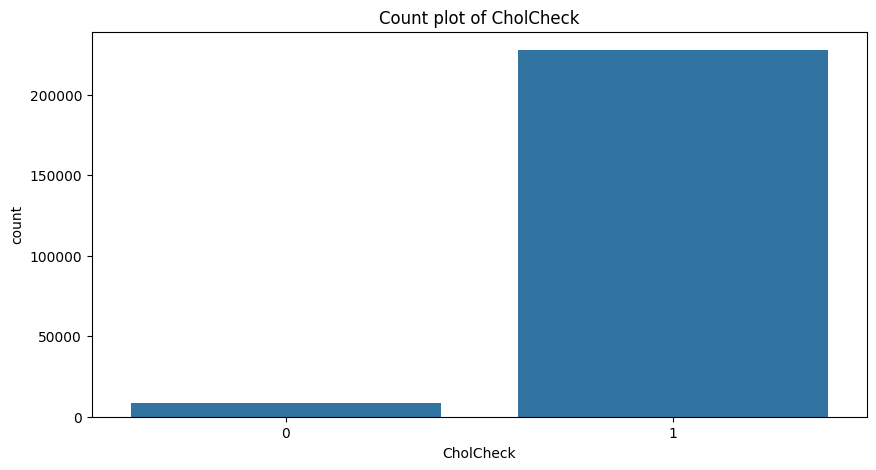

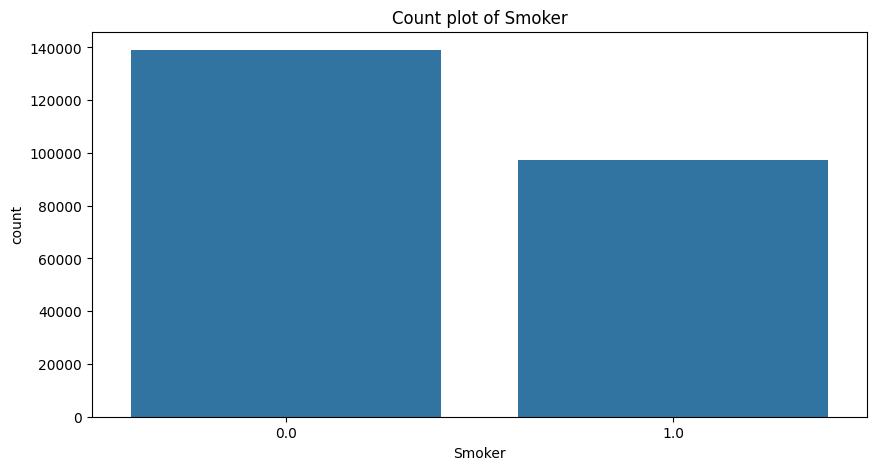

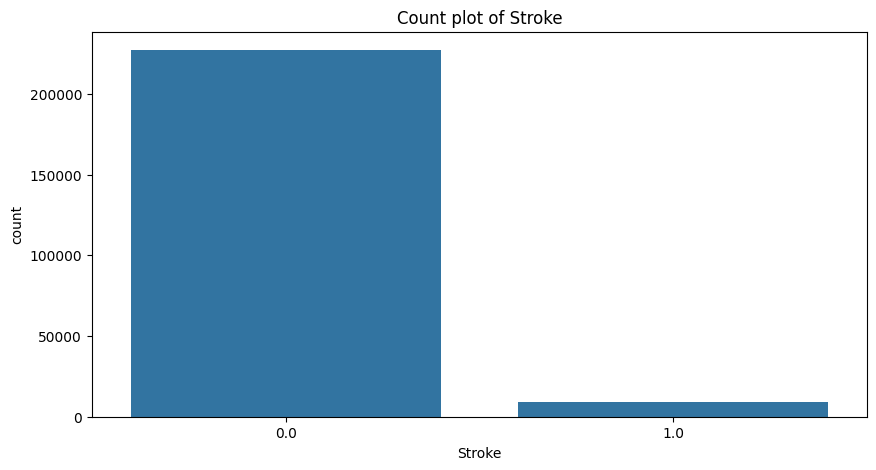

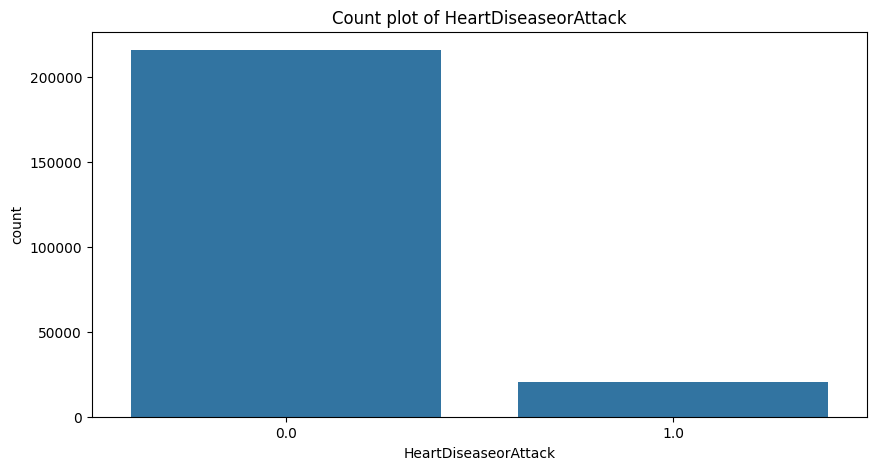

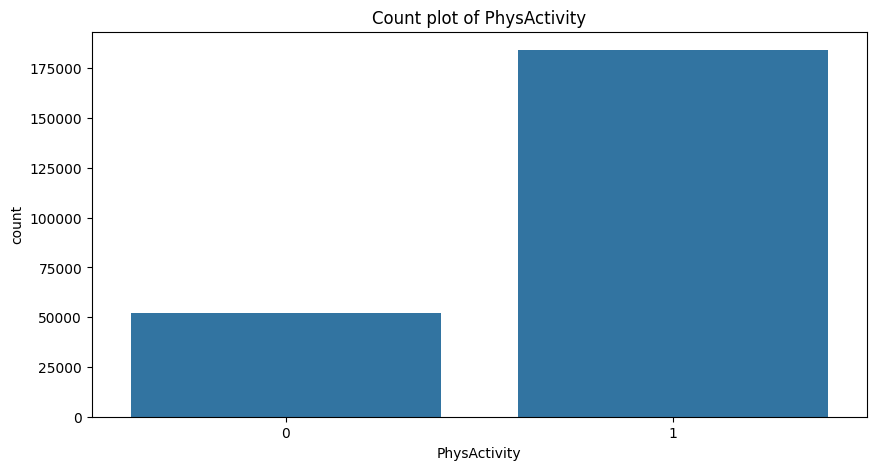

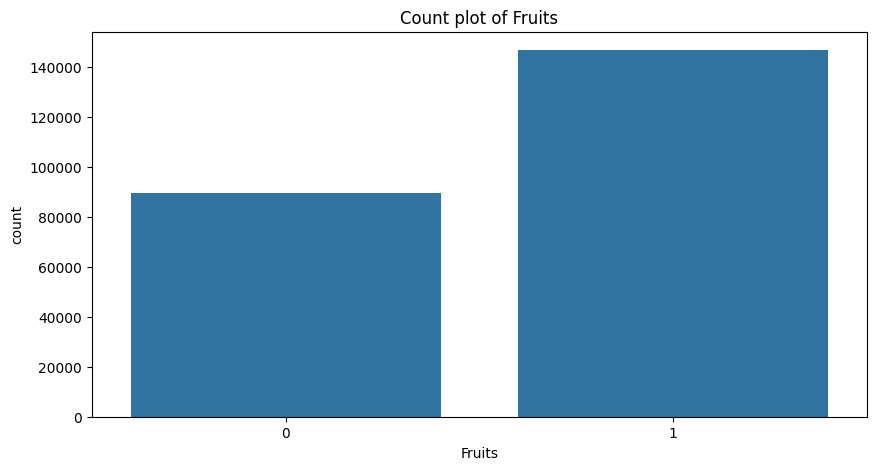

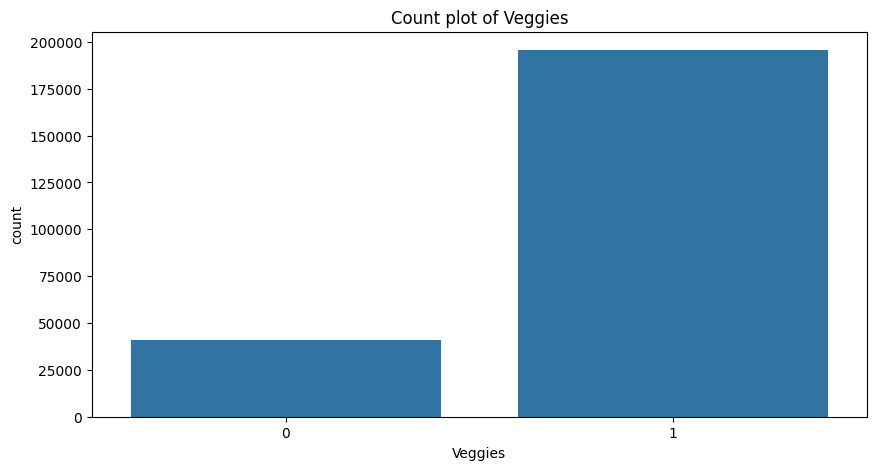

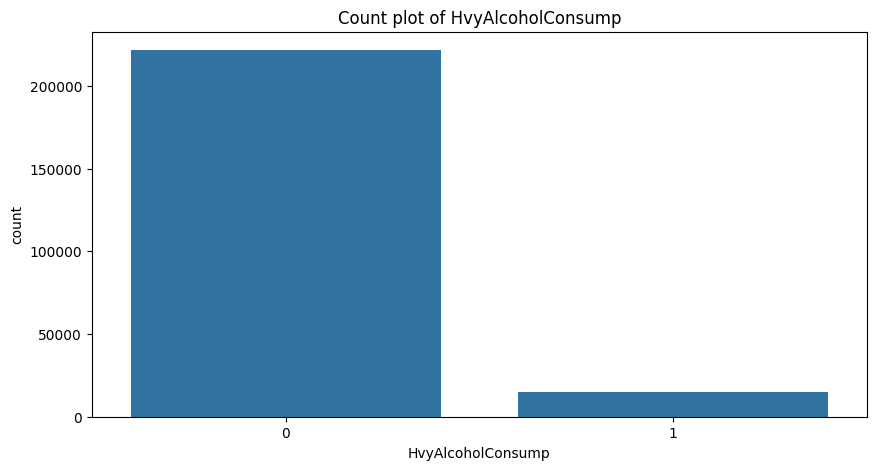

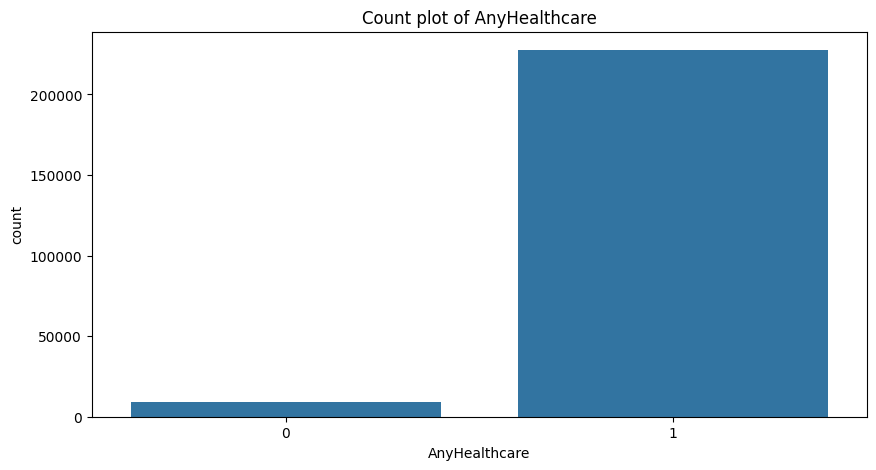

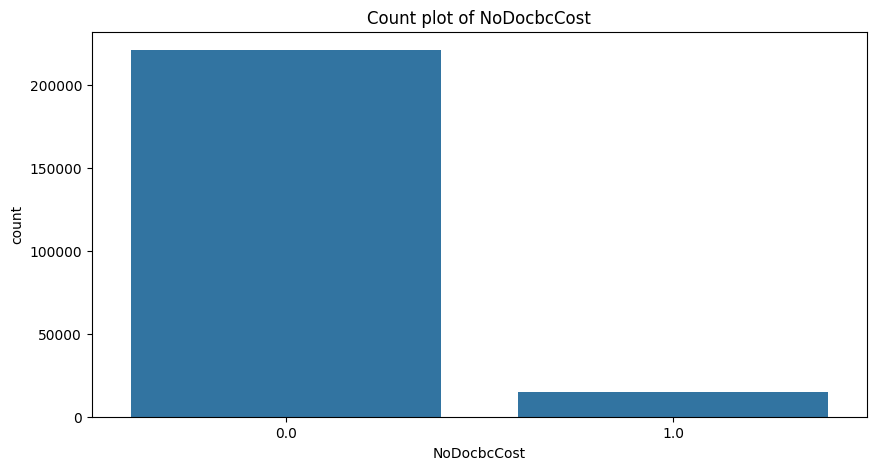

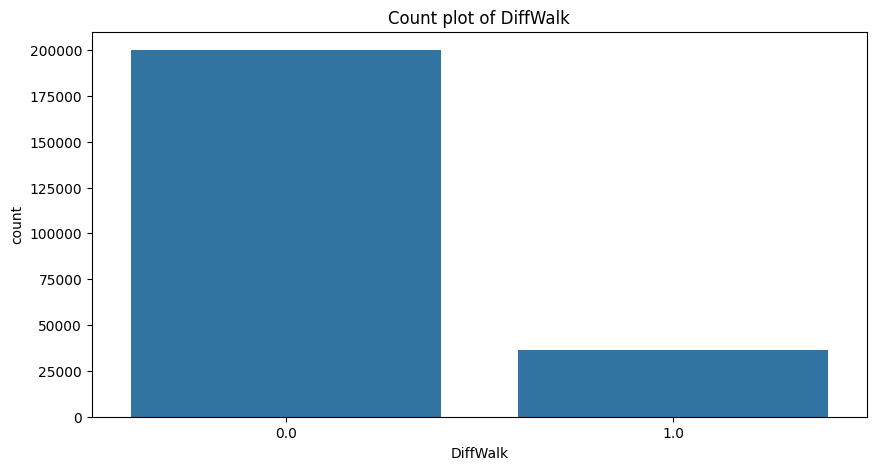

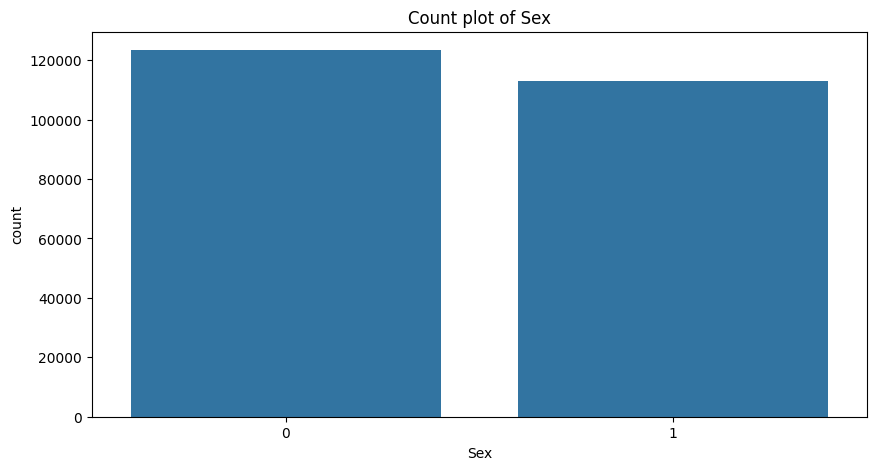

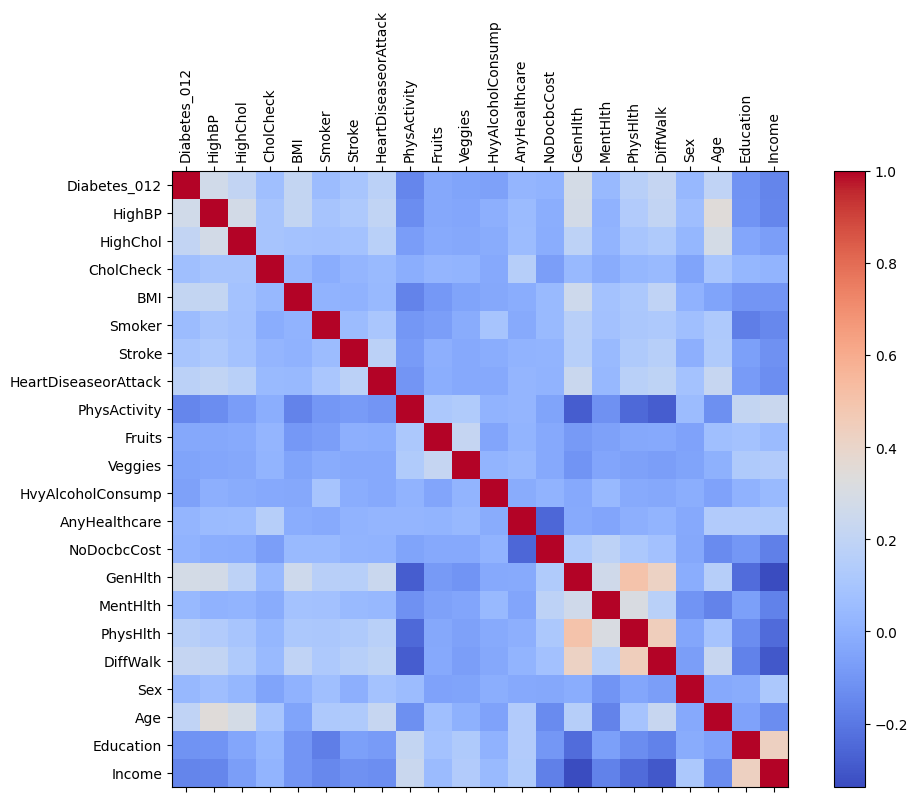

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[column])
    plt.title(f'Count plot of {column}')
    plt.show()

corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# **Task 3: Analyze the Data and Train the Model**

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Building a neural network model
def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    return model


input_shape = (X_train.shape[1],)
model = build_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9853 - accuracy: 0.5023 - val_loss: 0.9593 - val_accuracy: 0.5234
Epoch 2/20
11832/11832 [==============================] - 22s 2ms/step - loss: 0.9734 - accuracy: 0.5130 - val_loss: 0.9566 - val_accuracy: 0.5238
Epoch 3/20
11832/11832 [==============================] - 22s 2ms/step - loss: 0.9719 - accuracy: 0.5144 - val_loss: 0.9570 - val_accuracy: 0.5218
Epoch 4/20
11832/11832 [==============================] - 22s 2ms/step - loss: 0.9705 - accuracy: 0.5156 - val_loss: 0.9557 - val_accuracy: 0.5233
Epoch 5/20
11832/11832 [==============================] - 22s 2ms/step - loss: 0.9699 - accuracy: 0.5164 - val_loss: 0.9541 - val_accuracy: 0.5264
Epoch 6/20
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9692 - accuracy: 0.5180 - val_loss: 0.9533 - val_accuracy: 0.5232
Epoch 7/20
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9689 - accuracy: 0.5177 - val_loss: 0

# **Task 4:Test the Trained Model**

3698/3698 [==============================] - 5s 1ms/step - loss: 0.9478 - accuracy: 0.5311
Test Loss: 0.9478375911712646
Test Accuracy: 0.531073808670044
3698/3698 [==============================] - 4s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62     39438
           1       0.45      0.34      0.39     39438
           2       0.52      0.62      0.56     39439

    accuracy                           0.53    118315
   macro avg       0.53      0.53      0.52    118315
weighted avg       0.53      0.53      0.52    118315

Accuracy Score: 0.5310738283396019


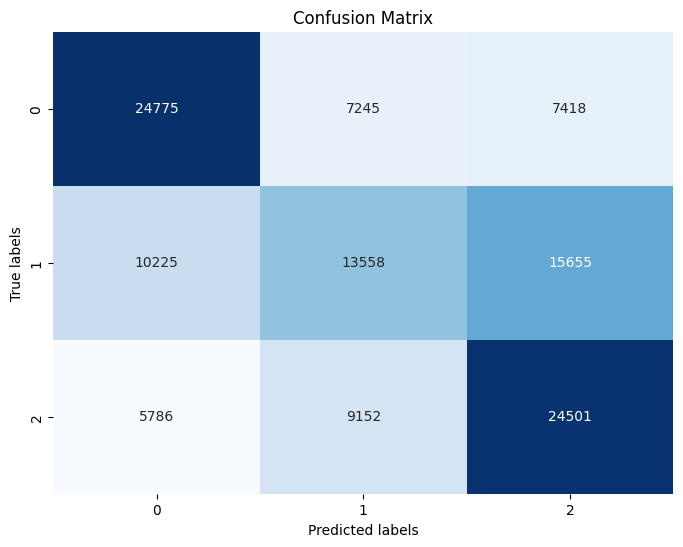

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print(f'Accuracy Score: {accuracy_score(y_test_classes, y_pred_classes)}')

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test_classes, y_pred_classes)


# **Task 5:Evaluate and Tune the Model**

Epoch 1/50
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9656 - accuracy: 0.5214 - val_loss: 0.9465 - val_accuracy: 0.5315 - lr: 0.0010
Epoch 2/50
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9661 - accuracy: 0.5204 - val_loss: 0.9487 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 3/50
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9657 - accuracy: 0.5208 - val_loss: 0.9461 - val_accuracy: 0.5286 - lr: 0.0010
Epoch 4/50
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9656 - accuracy: 0.5224 - val_loss: 0.9452 - val_accuracy: 0.5306 - lr: 0.0010
Epoch 5/50
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9651 - accuracy: 0.5213 - val_loss: 0.9474 - val_accuracy: 0.5319 - lr: 0.0010
Epoch 6/50
11832/11832 [==============================] - 23s 2ms/step - loss: 0.9654 - accuracy: 0.5217 - val_loss: 0.9457 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 7/50
11832/11832 [================

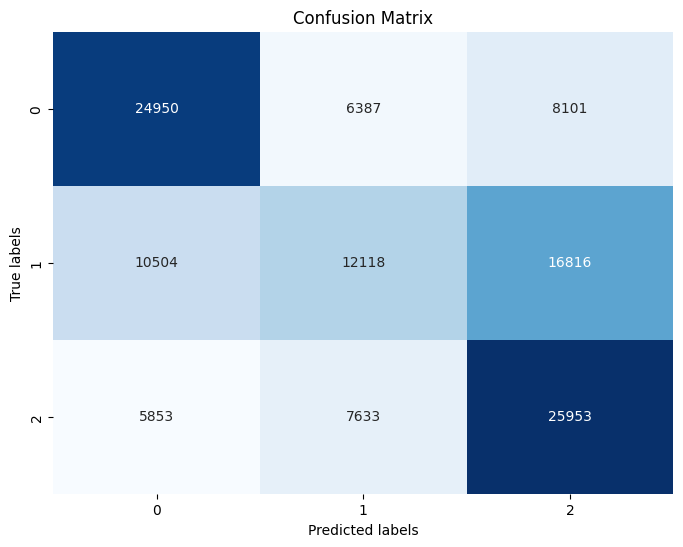

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Re-trained Test Loss: {test_loss}')
print(f'Re-trained Test Accuracy: {test_accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Re-trained Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print(f'Re-trained Accuracy Score: {accuracy_score(y_test_classes, y_pred_classes)}')

plot_confusion_matrix(y_test_classes, y_pred_classes)
